In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

# Replace '../Folder1/your_file.csv' with the actual path to your CSV file
data = pd.read_csv('Data_Files/owid-covid-data.csv')

# Display the first few rows of the DataFrame
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336078 entries, 0 to 336077
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    336078 non-null  object 
 1   continent                                   320099 non-null  object 
 2   location                                    336078 non-null  object 
 3   date                                        336078 non-null  object 
 4   total_cases                                 298424 non-null  float64
 5   new_cases                                   326839 non-null  float64
 6   new_cases_smoothed                          325576 non-null  float64
 7   total_deaths                                277172 non-null  float64
 8   new_deaths                                  326894 non-null  float64
 9   new_deaths_smoothed                         325664 non-null  float64
 

In [3]:
# Assume 'data' is your DataFrame
covid19_data = data[['location', 'date', 'icu_patients_per_million', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'total_cases', 'excess_mortality']]

covid19_data['icu_patients_per_million'] = covid19_data['icu_patients_per_million'] / 1000


covid19_data.head()

,location,date,icu_patients_per_million,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,total_cases,excess_mortality
0,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-06,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-07,NaN,NaN,NaN,NaN,NaN


In [4]:
# Rename the columns using the .rename() method
new_column_names = {
    'location': 'Location',
    'date': 'Date',
    'icu_patients_per_million': 'ICUPatientsPerMillion',
    'people_vaccinated_per_hundred': 'peopleVaccinatedPerHundred',
    'people_fully_vaccinated_per_hundred': 'peopleFullyVaccinatedPerHundred',
    'total_boosters_per_hundred': 'totalBoostersPerHundred',
    'excess_mortality': 'ExcessMortality',
    'total_cases': 'TotalCases'
}

covid19_data = covid19_data.rename(columns=new_column_names)
covid19_data.head()



,Location,Date,ICUPatientsPerMillion,peopleFullyVaccinatedPerHundred,totalBoostersPerHundred,TotalCases,ExcessMortality
0,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-01-04,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-01-05,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-01-06,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-01-07,NaN,NaN,NaN,NaN,NaN


In [5]:
covid19_data['Date'] = pd.to_datetime(covid19_data['Date'])
covid19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336078 entries, 0 to 336077
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Location                         336078 non-null  object        
 1   Date                             336078 non-null  datetime64[ns]
 2   ICUPatientsPerMillion            37235 non-null   float64       
 3   peopleFullyVaccinatedPerHundred  71353 non-null   float64       
 4   totalBoostersPerHundred          46446 non-null   float64       
 5   TotalCases                       298424 non-null  float64       
 6   ExcessMortality                  11656 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 17.9+ MB


In [6]:
Aus_data = covid19_data[covid19_data['Location'] == 'Australia']

Aus_data['ICUPatientsPerMillion'] = Aus_data['ICUPatientsPerMillion']  * 1000

Is_data = covid19_data[covid19_data['Location'] == 'Israel']

Is_data['ICUPatientsPerMillion'] = Is_data['ICUPatientsPerMillion']  * 1000

China_data = covid19_data[covid19_data['Location'] == 'China']

China_data['ICUPatientsPerMillion'] = China_data['ICUPatientsPerMillion']  * 1000

Swee_data = covid19_data[covid19_data['Location'] == 'Sweden']

Swee_data = Swee_data['ICUPatientsPerMillion'] = Swee_data['ICUPatientsPerMillion']  * 1000

In [18]:
Aus_data['Date'] = pd.to_datetime(Aus_data['Date'])
Aus_data = Aus_data.sort_values(by='Date')

Is_data['Date'] = pd.to_datetime(Is_data['Date'])
Is_data = Is_data.sort_values(by='Date')

China_data['Date'] = pd.to_datetime(China_data['Date'])
China_data = China_data.sort_values(by='Date')



288370    NaN
288371    NaN
288372    NaN
288373    NaN
288374    NaN
Name: ICUPatientsPerMillion, dtype: object

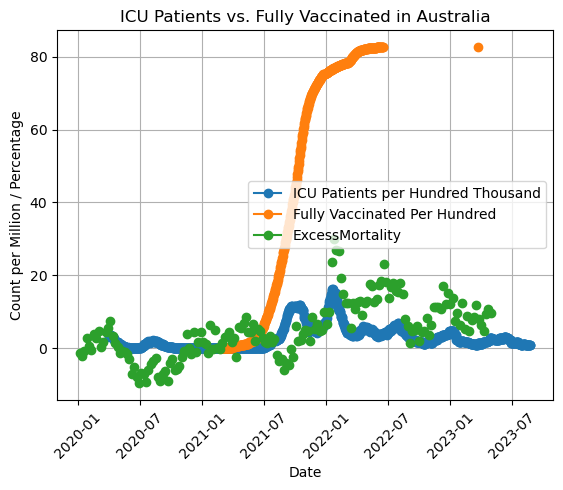

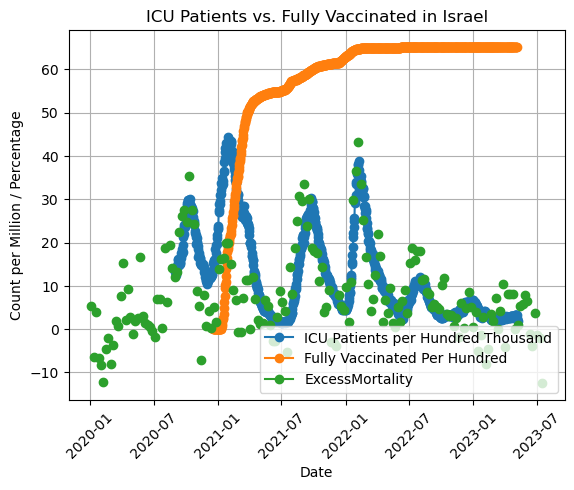

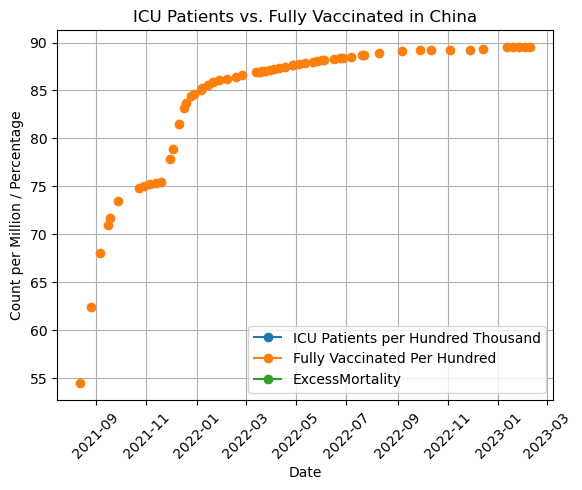

In [12]:
#Australia
plt.plot(Aus_data['Date'], Aus_data['ICUPatientsPerMillion'], label='ICU Patients per Hundred Thousand', marker='o')
plt.plot(Aus_data['Date'], Aus_data['peopleFullyVaccinatedPerHundred'], label='Fully Vaccinated Per Hundred', marker='o')
plt.plot(Aus_data['Date'], Aus_data['ExcessMortality'], label='ExcessMortality', marker='o')
#plt.plot(Aus_data['Date'], Aus_data['TotalCases'], label='TotalCases', marker='o')


#plt.figure(figsize=(15, 6))

plt.title('ICU Patients vs. Fully Vaccinated in Australia')
plt.xlabel('Date')
plt.ylabel('Count per Million / Percentage')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)


plt.show()
#Israel

plt.plot(Is_data['Date'], Is_data['ICUPatientsPerMillion'], label='ICU Patients per Hundred Thousand', marker='o')
plt.plot(Is_data['Date'], Is_data['peopleFullyVaccinatedPerHundred'], label='Fully Vaccinated Per Hundred', marker='o')
plt.plot(Is_data['Date'], Is_data['ExcessMortality'], label='ExcessMortality', marker='o')
#plt.plot(Aus_data['Date'], Aus_data['TotalCases'], label='TotalCases', marker='o')


#plt.figure(figsize=(15, 6))

plt.title('ICU Patients vs. Fully Vaccinated in Israel')
plt.xlabel('Date')
plt.ylabel('Count per Million / Percentage')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)


plt.show()

#China

plt.plot(China_data['Date'], China_data['ICUPatientsPerMillion'], label='ICU Patients per Hundred Thousand', marker='o')
plt.plot(China_data['Date'], China_data['peopleFullyVaccinatedPerHundred'], label='Fully Vaccinated Per Hundred', marker='o')
plt.plot(China_data['Date'], China_data['ExcessMortality'], label='ExcessMortality', marker='o')
#plt.plot(Aus_data['Date'], Aus_data['TotalCases'], label='TotalCases', marker='o')


#plt.figure(figsize=(15, 6))

plt.title('ICU Patients vs. Fully Vaccinated in China')
plt.xlabel('Date')
plt.ylabel('Count per Million / Percentage')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

plt.show()



In [ ]:
# Export the DataFrame to a CSV file
Aus_data.to_csv('Australia_grouped_data.csv', index=True)
Is_data.to_csv('Australia_grouped_data.csv', index=True)
China_data.to_csv('Australia_grouped_data.csv', index=True)

In [15]:
Swee_data

RecursionError: maximum recursion depth exceeded while calling a Python object

In [ ]:
#sweeden
plt.plot(Aus_data['Date'], Swee_data['ExcessMortality'], label='ExcessMortality', marker='o')
plt.plot(Aus_data['Date'], Swee_data['TotalCases'], label='TotalCases', marker='o')


#plt.figure(figsize=(15, 6))

plt.title('ICU Patients vs. Fully Vaccinated in Australia')
plt.xlabel('Date')
plt.ylabel('Count per Million / Percentage')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)


plt.show()

In [ ]:
Aus_data.info()

In [ ]:
## How to add the Column GDPNew and PopulationNew to the dataframe

In [ ]:
# Function to map year to population.  This is Hardwiring the numbers.
def map_year_to_population(date_str):
    year = int(date_str.split('-')[0])
    if year == 2020:
        return 25655289
    elif year == 2021:
        return 25688079
    elif year == 2022:
        return 25978935
    else:
        return None  # You can specify a default value or handle other cases as needed

# Apply the mapping function to create a new "Population" column
Australia_grouped_data['Population'] = Australia_grouped_data['Date'].apply(map_year_to_population)

# Display the DataFrame
Australia_grouped_data.head()

In [ ]:
# Function to map year to population.  This is Hardwiring the numbers.
def map_value_to_gdp(date_str):
    year = int(date_str.split('-')[0])
    if year == 2020:
        return 1326944627876.87
    elif year == 2021:
        return 1552703151616.01
    elif year == 2022:
        return 1675418665067.09
    else:
        return None  # You can specify a default value or handle other cases as needed

# Apply the mapping function to create a new "Population" column
Australia_grouped_data['gDPNew'] = Australia_grouped_data['Date'].apply(map_value_to_gdp)

# Display the DataFrame
Australia_grouped_data.head()

In [ ]:
# Data from World Bank API query
GDP_Data= [{'Year': '2020', 'GDP': 1326944627876.87},
           {'Year': '2021', 'GDP': 1552703151616.01},
           {'Year': '2022', 'GDP': 1675418665067.09}]

In [ ]:
# Data from World Bank API
PopulationData = [{'Date': '2020', 'Population Total': 25655289},
                  {'Date': '2021', 'Population Total': 25688079},
                  {'Date': '2022', 'Population Total': 25978935}]

In [ ]:
PopulationData[0]["Date"]

In [ ]:
PopulationData[1]["Population Total"]

In [ ]:
Year1 = GDP_Data[0]["Year"]
GDP1 = GDP_Data[0]["GDP"]

# Convert to integer
numeric_value = pd.to_numeric(GDP_Data[0]["Year"], errors='coerce')
numeric_value

In [ ]:
Year2 = GDP_Data[1]["Year"]
GDP2 = GDP_Data[1]["GDP"]

In [ ]:
Year3 = GDP_Data[2]["Year"]
GDP3 = GDP_Data[2]["GDP"]

In [ ]:
# Function to map year to population.  This is automating it.
def map_year_to_population(date_str):
    year = int(date_str.split('-')[0])
    if year == pd.to_numeric(PopulationData[0]["Date"], errors='coerce'):
        return PopulationData[0]["Population Total"]
    elif year == pd.to_numeric(PopulationData[1]["Date"], errors='coerce'):
        return PopulationData[1]["Population Total"]
    elif year == pd.to_numeric(PopulationData[1]["Date"], errors='coerce'):
        return PopulationData[2]["Population Total"]
    else:
        return None  # You can specify a default value or handle other cases as needed

# Apply the mapping function to create a new "Population" column
Australia_grouped_data['PopulationNew'] = Australia_grouped_data['Date'].apply(map_year_to_population)

# Display the DataFrame
Australia_grouped_data.head()

In [ ]:
# Function to map year to population.  THis is automating it.
def map_value_to_gdp(date_str):
    year = int(date_str.split('-')[0])
    if year == pd.to_numeric(GDP_Data[0]["Year"], errors='coerce'):
        return GDP_Data[0]["GDP"]
    elif year == pd.to_numeric(GDP_Data[0]["Year"], errors='coerce'):
        return GDP_Data[1]["GDP"]
    elif year == pd.to_numeric(GDP_Data[0]["Year"], errors='coerce'):
        return GDP_Data[2]["GDP"]
    else:
        return None  # You can specify a default value or handle other cases as needed

# Apply the mapping function to create a new "Population" column
Australia_grouped_data['gDPNew'] = Australia_grouped_data['Date'].apply(map_value_to_gdp)

# Display the DataFrame
Australia_grouped_data.head()